# Introduction

In this notebook, we will do the following:
1. Import pandas and data vizualization libraries
2. Visualize the column data
    - univariate analysis with either a histogram or a barplot
    - bivariate analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load CSV
raw_df = pd.read_csv('part2_result.csv')

In [4]:
raw_df.sample(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,real_month,remaining_lease
442236,2004-07,YISHUN,4 ROOM,289,YISHUN AVE 6,01 TO 03,84.0,SIMPLIFIED,1987,153000.0,2004,7,82
604597,2010-03,WOODLANDS,4 ROOM,779,WOODLANDS CRES,10 TO 12,101.0,MODEL A,1997,322000.0,2010,3,86
803204,2019-09,CLEMENTI,3 ROOM,428,CLEMENTI AVE 3,04 TO 06,67.0,NEW GENERATION,1978,325000.0,2019,9,57


### Univariate Analysis (UA)

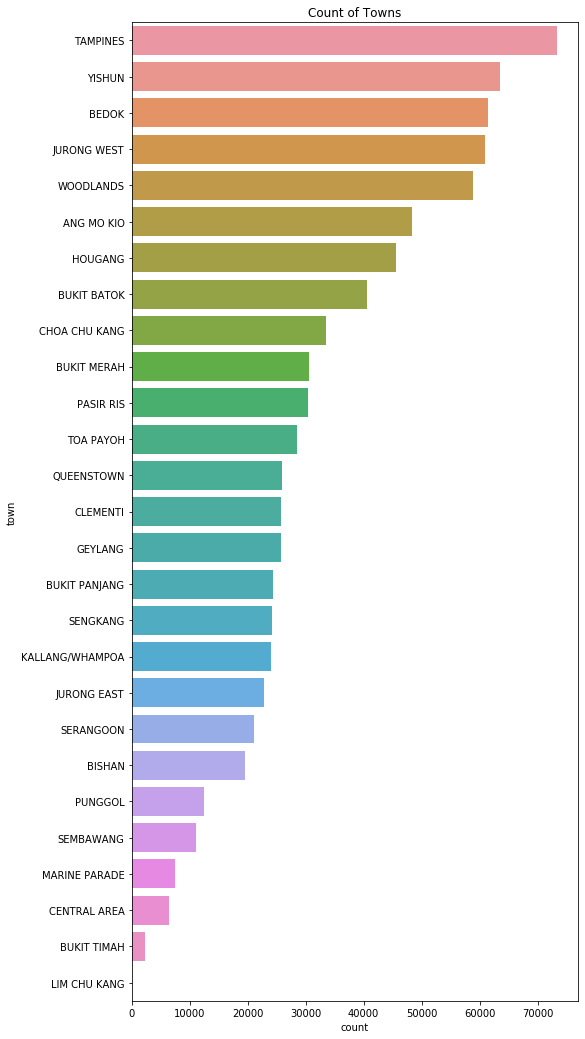

In [30]:
# Plot a barplot for frequencies of "town" to see representation of towns in dataset
plt.figure(figsize = (8,18))
sns.countplot(y=raw_df['town'], order=raw_df['town'].value_counts().index)
plt.title('Count of Towns')
plt.show()

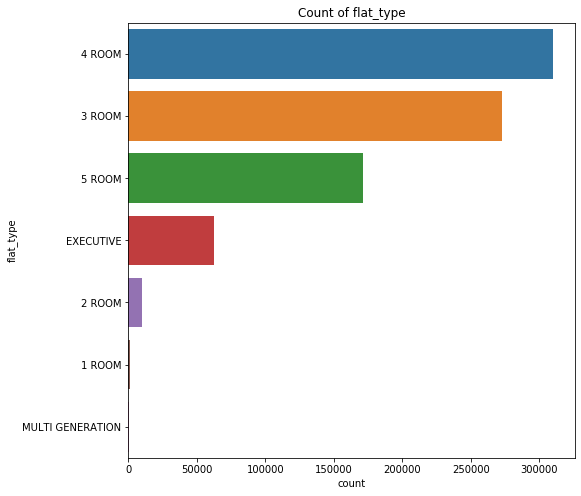

In [35]:
# Plot a barplot with counts of "flat_type" to find most common flat types
plt.figure(figsize = (8,8))
sns.countplot(y=raw_df['flat_type'], order=raw_df['flat_type'].value_counts().index)
plt.title('Count of flat_type')
plt.show()

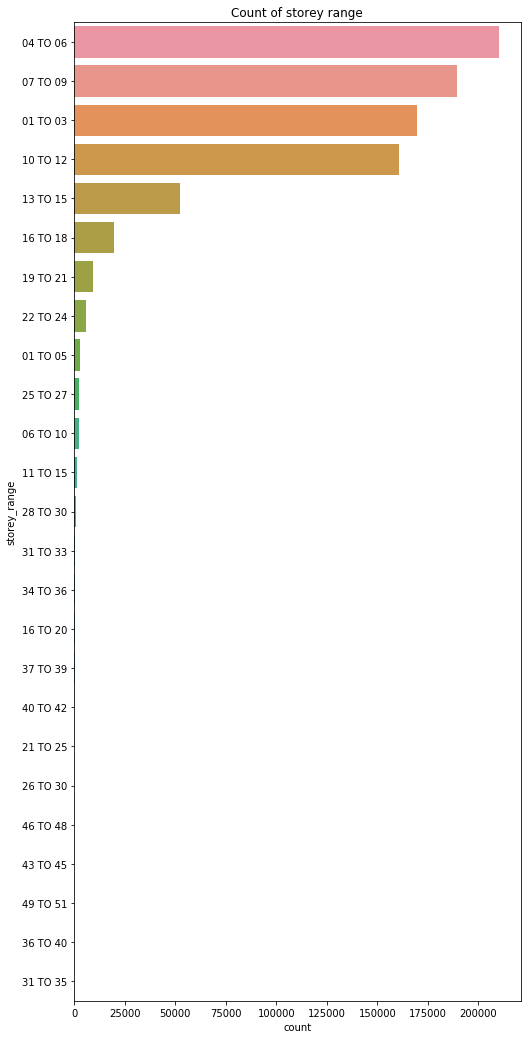

In [40]:
# Plot a barplot with freq of "storey_range" to see where sellers usually live
plt.figure(figsize=(8,18))
sns.countplot(y=raw_df['storey_range'], order=raw_df['storey_range'].value_counts().index)
plt.title('Count of storey range')
plt.show()

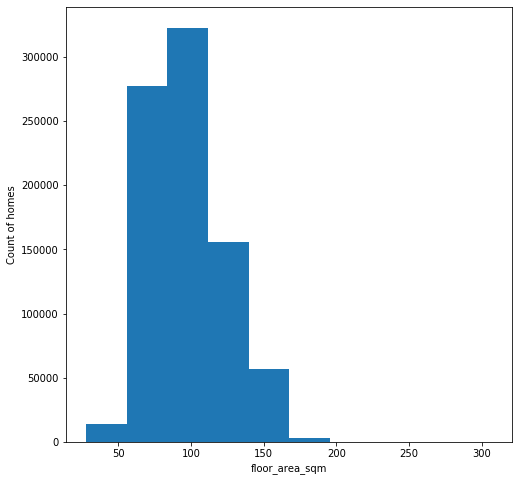

In [43]:
# Plot a histogram with "floor_area_sqm" to find any outliers
plt.figure(figsize=(8,8))
plt.hist(raw_df['floor_area_sqm'])
#sns.distplot(raw_df['floor_area_sqm'])
plt.xlabel('floor_area_sqm')
plt.ylabel('Count of homes')
plt.show()

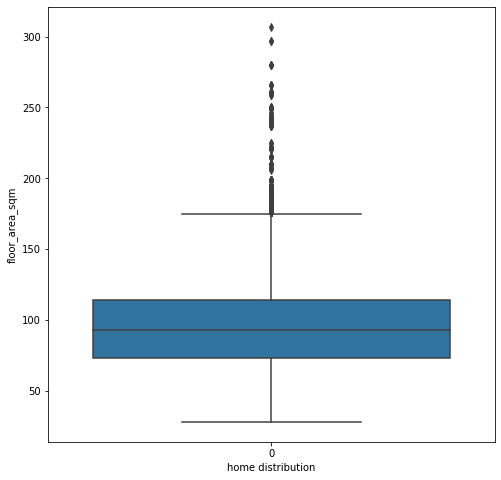

In [46]:
plt.figure(figsize=(8,8))
sns.boxplot(data=raw_df['floor_area_sqm'])
plt.xlabel('home distribution')
plt.ylabel('floor_area_sqm')
plt.show()

# Observations from query above
- Most units are between 75sqm - 175sqm
- Median area is around 90sqm
- Outliers start from >175sqm, but boxplot is mainly to note that there are units with 300sqm

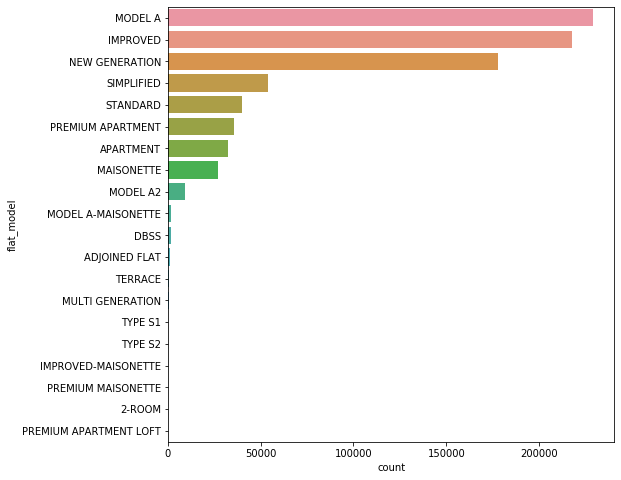

In [47]:
# Plot a barplot with freq of "flat_model" to find most common flat models
plt.figure(figsize=(8,8))
sns.countplot(y=raw_df['flat_model'],order=raw_df['flat_model'].value_counts().index)
plt.show()

# Observations from above query
- Over the yrs, govt has changed / expanded HDB building templates by 20 times

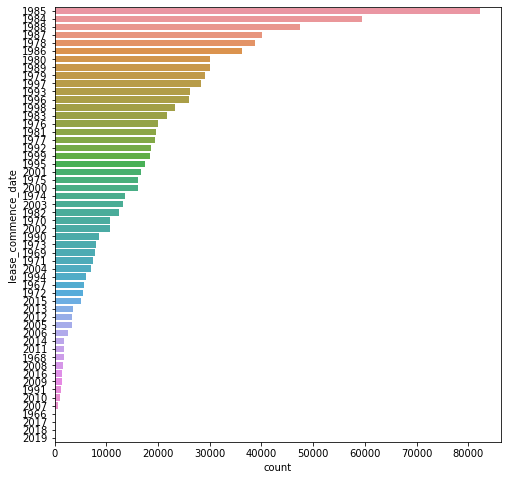

In [60]:
# Plot a barplot with freq of "lease_commense_date" to see when units were first inhabited
plt.figure(figsize=(8,8))
sns.countplot(y=raw_df['lease_commence_date']
              ,order=raw_df['lease_commence_date'].value_counts().index
                      )
#plt.title('Count of lease commence date')
plt.show()

# Observations from above query
- The largest no. of homes on resale mkt first started lease in 1985, 1984, 1988 or 1987
- Means that these years were the bumper crop yr where many HDB finished building

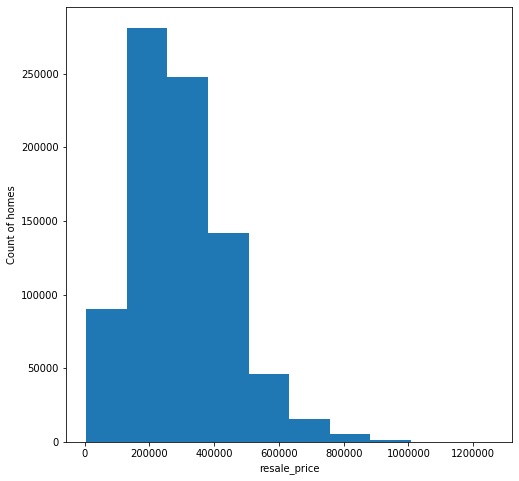

In [64]:
# Plot a histogram with "resale_price" to see the range of resale prices
plt.figure(figsize=(8,8))
plt.hist(raw_df['resale_price'])
plt.xlabel('resale_price')
plt.ylabel('Count of homes')
plt.show()

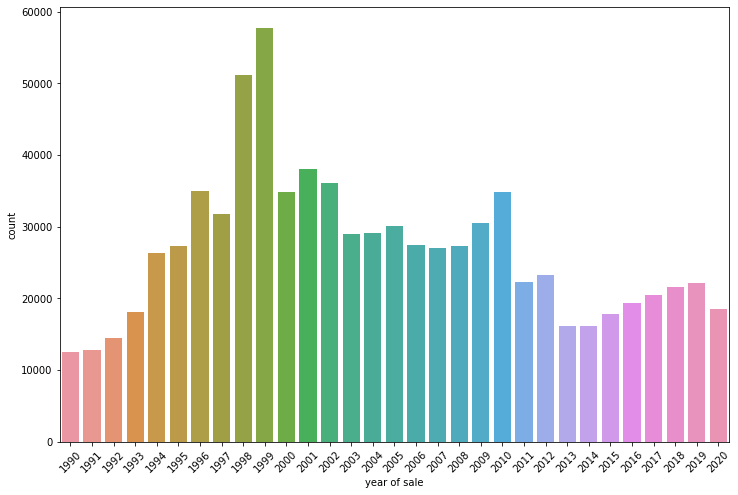

In [72]:
# Plot a barplot with 'year' to see resale trends over time
plt.figure(figsize = (12,8))
sns.countplot(x=raw_df['year'])
plt.xticks(rotation=45)
plt.xlabel('year of sale')
plt.show()

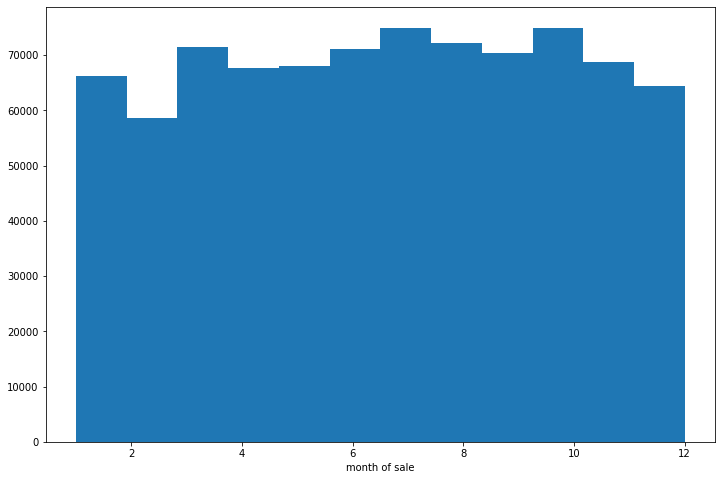

In [79]:
# Plot a barplot with "real_month" to find patterns on months of sale
plt.figure(figsize=(12,8))
plt.hist(raw_df['real_month'],bins=12)
plt.xlabel('month of sale')
plt.show()

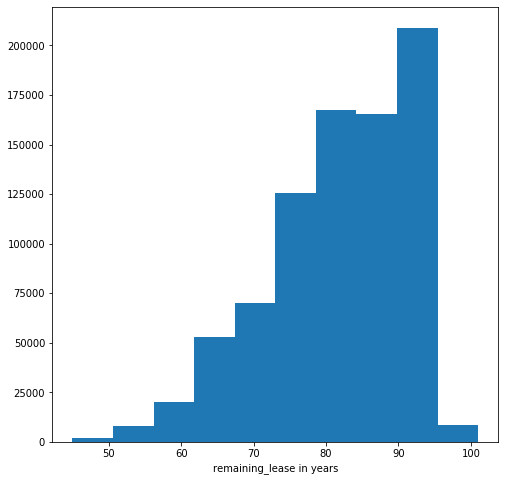

In [78]:
# Plot remaining_lease using a barplot to see when sellers usually sell during the 99-yr lease
plt.figure(figsize=(8,8))
plt.hist(raw_df['remaining_lease'])
plt.xlabel('remaining_lease in years')
plt.show()

## Bivariate Analysis (BA)

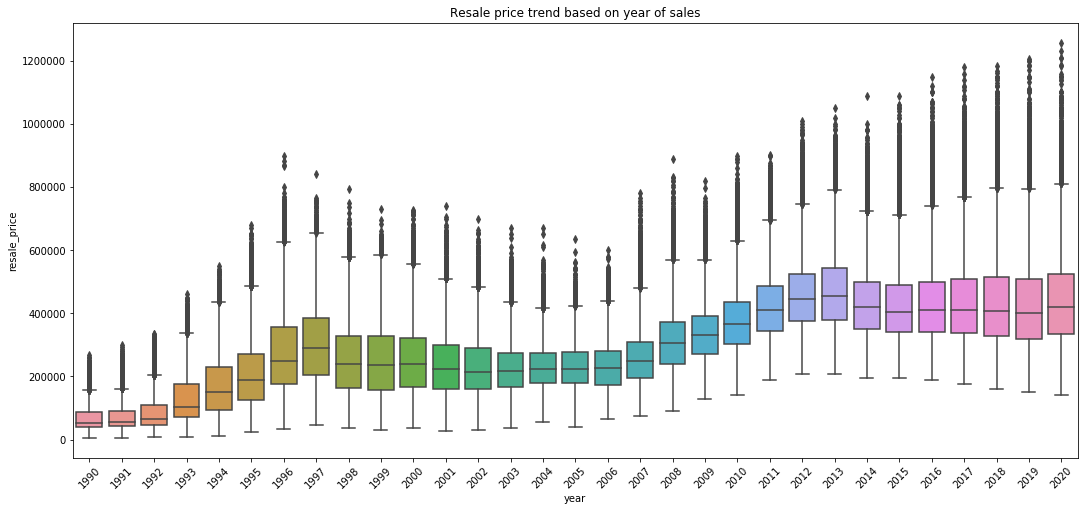

In [11]:
# Plot year vs resale_price with a boxplot to see if resale_price fluctuates over time
plt.figure(figsize=(18,8))
sns.boxplot(x=raw_df['year']
           ,y=raw_df['resale_price'])
plt.xticks(rotation=45)
plt.title('Resale price trend based on year of sales')
plt.show()

# Observations from above query
- Resale prices peaked near crises (eg 1997, 2013). 2008-2009 is an exception for some reason
- Quite obvious on the impact of cooling measures on 2013, but then impact started to wane in 2018
- During times when prices are 'low', the IQR is shorter, vice versa when prices are 'high'
- In 1990, the median leans towards the lower prices, but from 1997, the median is more reflective of the average prices. Feels to me like 1990-1996, it was not common for ppl to flip real estate.
- Also interesting that there is no resale data before 1990... not sure if govt only started collecting data on 1990, or before that there was no one sellin real estate

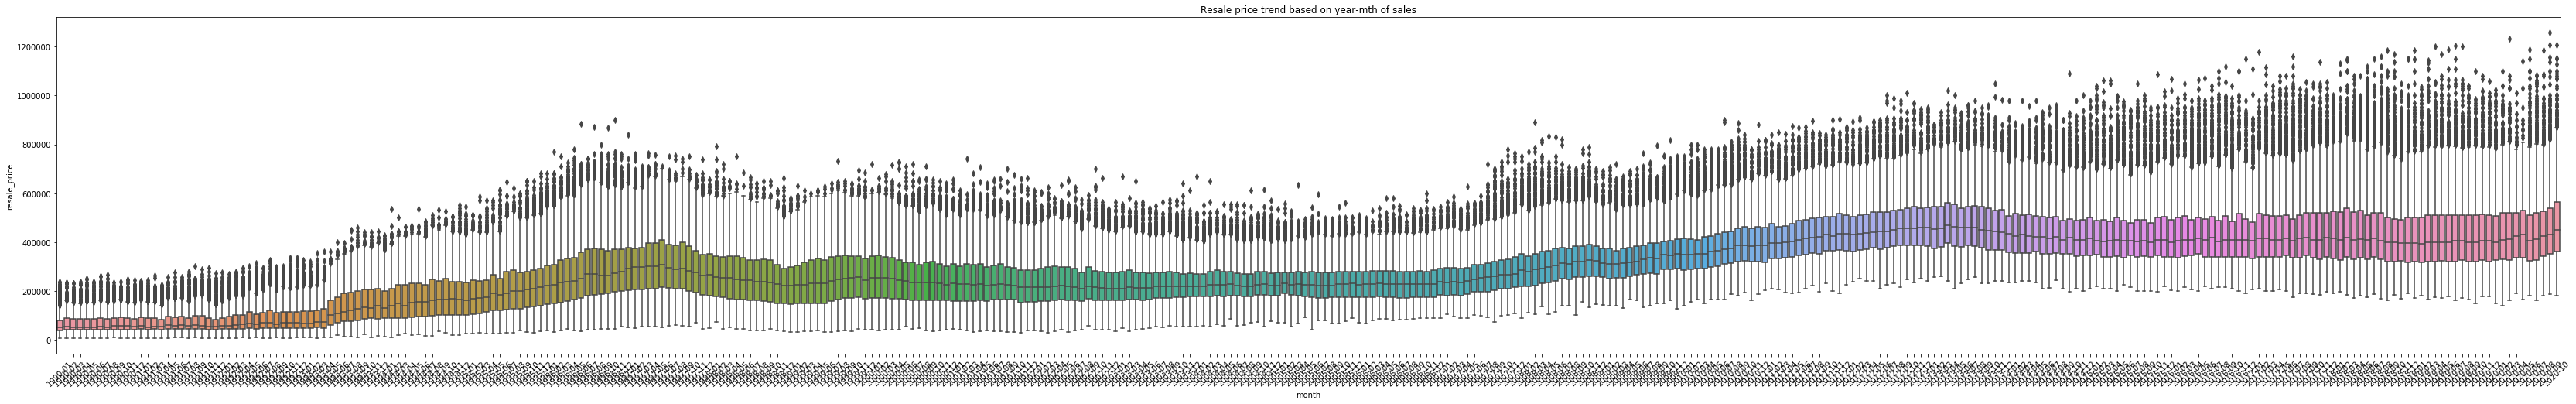

In [14]:
# Plot month vs resale_price with a boxplot to find patterns in months of a year
plt.figure(figsize=(58,8))
sns.boxplot(x=raw_df['month']
           ,y=raw_df['resale_price'])
plt.xticks(rotation=45)
plt.title('Resale price trend based on year-mth of sales')
plt.show()

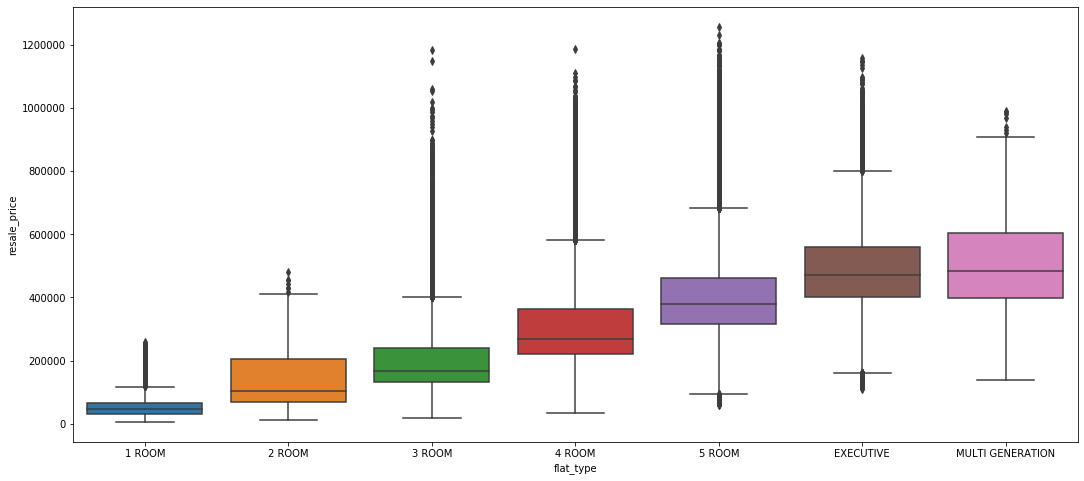

In [24]:
# Perform a boxplot using 'flat_type' vs 'resale_price' to find a relationship
plt.figure(figsize=(18,8))
sns.boxplot(x=raw_df['flat_type']
           ,y=raw_df['resale_price'],order=['1 ROOM','2 ROOM','3 ROOM','4 ROOM','5 ROOM','EXECUTIVE','MULTI GENERATION'])
plt.show()

In [9]:
# Create new df where flat model is sorted according to mean resale price
group_df1 = raw_df.groupby('flat_model',as_index=False)
sorted_list = group_df1['resale_price'].mean().sort_values(by='resale_price',ascending=False)
sorted_list

,flat_model,resale_price
19,TYPE S2,1.015732e+06
18,TYPE S1,8.989152e+05
13,PREMIUM APARTMENT LOFT,8.648666e+05
3,DBSS,7.521688e+05
14,PREMIUM MAISONETTE,5.931486e+05
10,MULTI GENERATION,5.054624e+05
17,TERRACE,5.005484e+05
2,APARTMENT,4.855021e+05
6,MAISONETTE,4.783342e+05
1,ADJOINED FLAT,4.675286e+05


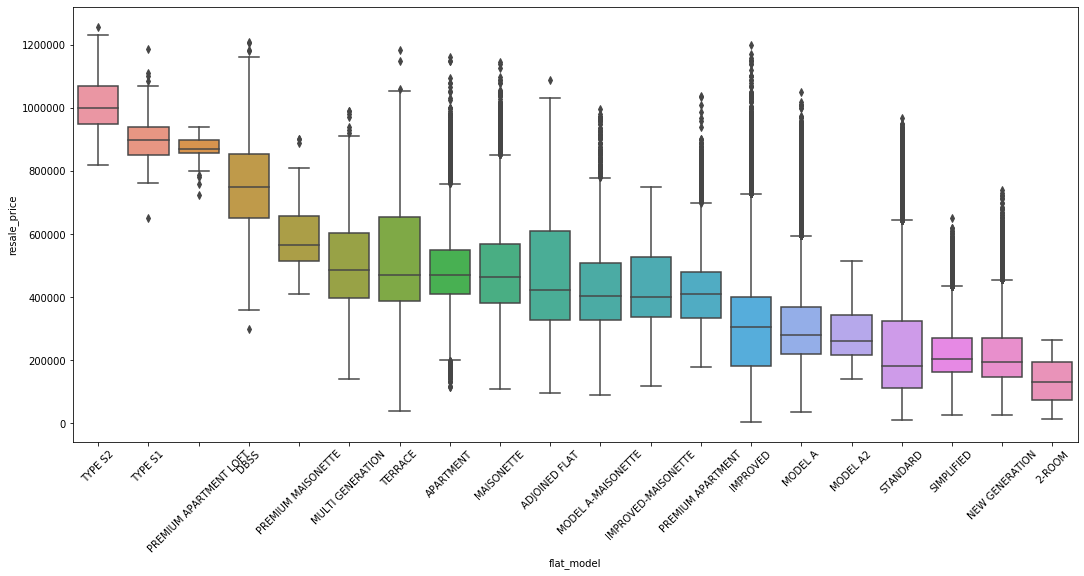

In [12]:
# Perform a boxplot using "flat_model" and "resale_price"
plt.figure(figsize=(18,8))
sns.boxplot(x=raw_df['flat_model']
           ,y=raw_df['resale_price'], order=sorted_list['flat_model'])
plt.xticks(rotation=45)
plt.show()

### Which are the current flat model templates used after 2000s? and which are the templates used at the start in 1960s?

In [6]:
raw_df.groupby('flat_model', as_index=False)['lease_commence_date'].min().sort_values(by='lease_commence_date')

,flat_model,lease_commence_date
4,IMPROVED,1966
0,2-ROOM,1967
1,ADJOINED FLAT,1967
16,STANDARD,1967
17,TERRACE,1968
11,NEW GENERATION,1976
7,MODEL A,1978
5,IMPROVED-MAISONETTE,1983
8,MODEL A-MAISONETTE,1983
2,APARTMENT,1984


In [7]:
raw_df.groupby('flat_model', as_index=False)['year'].max().sort_values(by='year')

,flat_model,year
0,2-ROOM,2020
17,TERRACE,2020
16,STANDARD,2020
15,SIMPLIFIED,2020
14,PREMIUM MAISONETTE,2020
13,PREMIUM APARTMENT LOFT,2020
12,PREMIUM APARTMENT,2020
11,NEW GENERATION,2020
10,MULTI GENERATION,2020
9,MODEL A2,2020


# Observations from above query
- Since Apartment & Masonette holders have the most outliers, holders must be proficient w other factors (eg location) to have abv avg returns
- Type S2, S1, Prem loft have low variability in prices, holders is likely to get abv avg returns if they find one below 800k. However, their low variability could be due to them being the newer flat models w less sales over the years.
- Apartment & DBSS are the only models with outliers below the 1st quartile. New owners would be advised to research other factors more closely before buying.
- As of 2020, all existing flat templates are still being used


In [23]:
# Create new df where town is sorted by median resale price
group_df2=raw_df.groupby('town',as_index=False)
sorted_list2=group_df2['resale_price'].median().sort_values(by='resale_price',ascending=False)
sorted_list2

,town,resale_price
18,PUNGGOL,438000.0
21,SENGKANG,405000.0
6,BUKIT TIMAH,400000.0
2,BISHAN,380000.0
17,PASIR RIS,376000.0
20,SEMBAWANG,352500.0
8,CHOA CHU KANG,320000.0
23,TAMPINES,301000.0
5,BUKIT PANJANG,293000.0
16,MARINE PARADE,288000.0


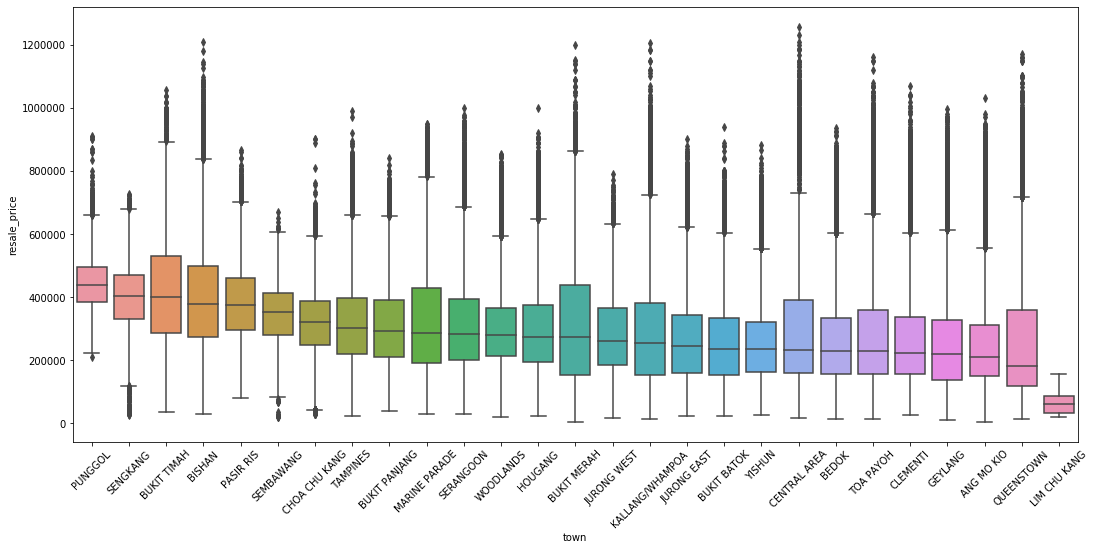

In [24]:
# Perform a boxplot using "town" and "resale_price"
plt.figure(figsize=(18,8))
sns.boxplot(x=raw_df['town']
           ,y=raw_df['resale_price']
           ,order=sorted_list2['town']
           )
plt.xticks(rotation=45)
plt.show()

# Observations from above query
- If outliers are excluded, Bukit Timah has the highest resale price.
- If outliers are included, Central area has the highest resale price, and Bishan/ Bt Merah/Queenstown are next in line. This makes Bishan/ Bt Merah/Queenstown a very valuable sub-urban area
- While Seng Kang has the 2nd highest median price, it has many outliers at the bottom, making Seng Kang a risky location to buy in without taking into consideration other factors


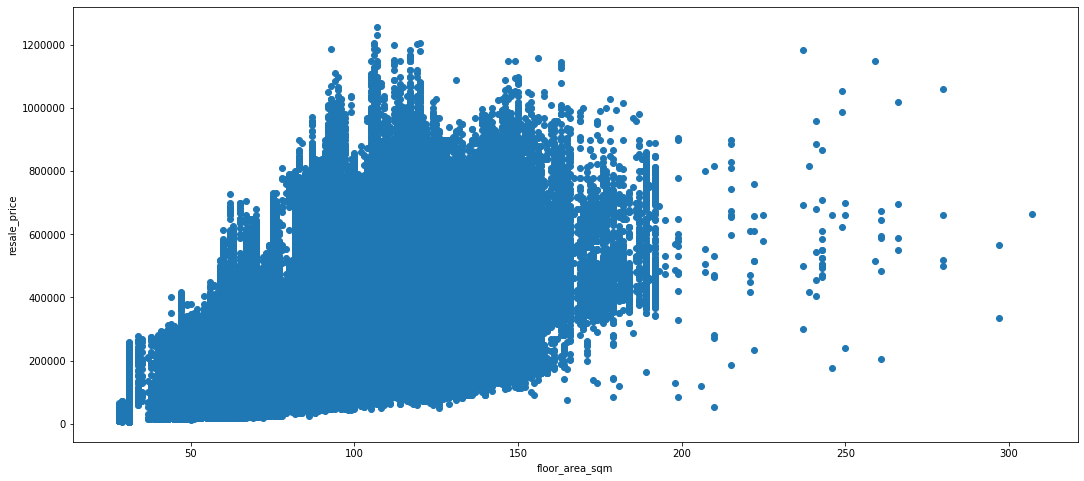

In [25]:
# Plot floor_area_sqm vs resale_price with a scatterplot
plt.figure(figsize=(18,8))
plt.scatter(x=raw_df['floor_area_sqm']
           ,y=raw_df['resale_price'])
plt.xlabel('floor_area_sqm')
plt.ylabel('resale_price')
plt.show()

# Observations from above query
- In general, the higher the area, the higher the price
- The sweet spot for flat size seems to be 100sqm, whereby any increase in area may or may not increase the price (as seen from the highest prices of that area)


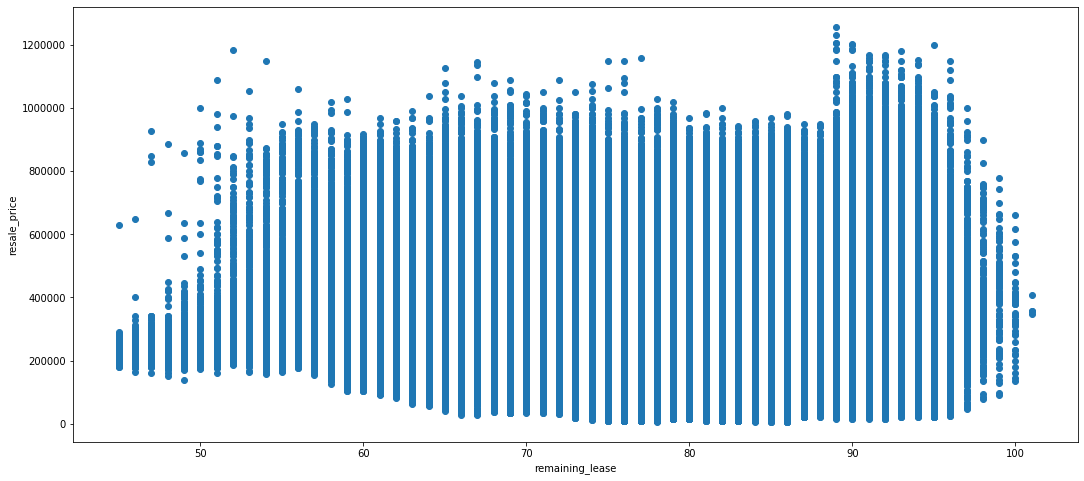

In [26]:
# Plot remaining_lease vs resale_price with scatterplot
plt.figure(figsize=(18,8))
plt.scatter(x=raw_df['remaining_lease']
           ,y=raw_df['resale_price'])
plt.xlabel('remaining_lease')
plt.ylabel('resale_price')
plt.show()

# Observations from above query
- The no.of sales & max price increases steeply at the 5th yr and drops steeply after the 10th yr of lease. 5th yr is understandable due to housing policy. But the 10th yr is interesting to note.
- No. of sales & max price then drops drastically at approx 51-52th yr of lease

### Which are the current flat model templates used after 2000s? and which are the templates used at the start in 1960s?

In [5]:
raw_df.groupby('flat_model', as_index=False)['lease_commence_date'].min().sort_values(by='lease_commence_date')

,flat_model,lease_commence_date
4,IMPROVED,1966
0,2-ROOM,1967
1,ADJOINED FLAT,1967
16,STANDARD,1967
17,TERRACE,1968
11,NEW GENERATION,1976
7,MODEL A,1978
5,IMPROVED-MAISONETTE,1983
8,MODEL A-MAISONETTE,1983
2,APARTMENT,1984


### Plot the year of sales vs the resale price. Has resale price been going up over the yrs? Is selling at 1mil in 2019 similar to selling at 400k in 1990?

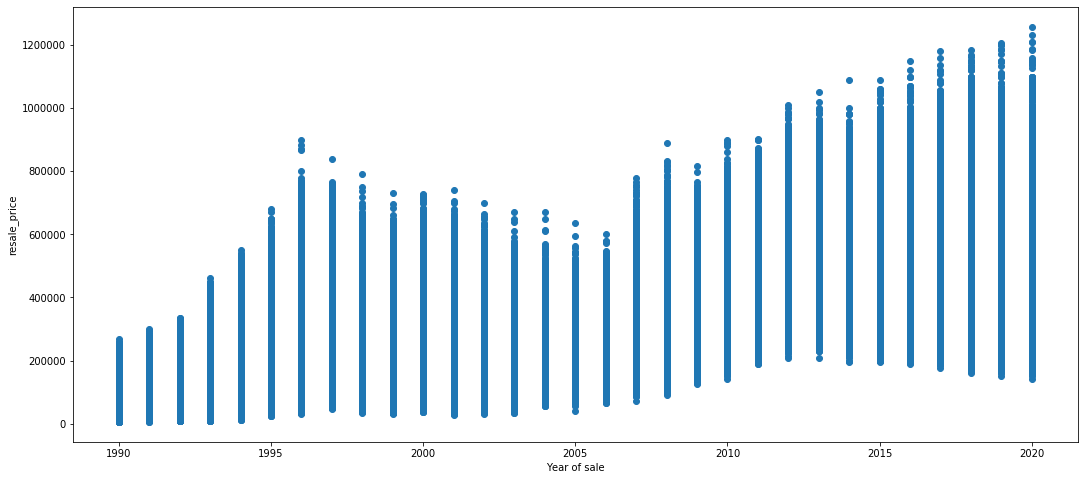

In [9]:
plt.figure(figsize=(18,8))
plt.scatter(x=raw_df['year']
           ,y=raw_df['resale_price'])
plt.xlabel('Year of sale')
plt.ylabel('resale_price')
plt.show()